1. Za pomoci níže uvedeného kódu naimportujte knihovny a do proměnné url získejte adresu datasetu

```python
# Import potrebnych knihoven
import pandas as pd
import numpy as np

# Stazeni .csv souboru publikovaneho na github.com
url = 'https://raw.githubusercontent.com/petrrozkosny/pydata/main/pydata_data.csv'
```

2. Načtete data z proměnné url do pandas dataframe, proměnnou pojmenujte ```df```.
3. Upravte datový typ sloupce ```DATE``` na ```datetime```.
4. Přidejte do ```df``` sloupec ```YEAR``` a ```MONTH```
5. Vypište za pomoci funkce print() datové typy jednotlivých sloupců.

In [1]:
# Buňka pro body 1-5
import numpy as np
import pandas as pd

url = 'https://raw.githubusercontent.com/petrrozkosny/pydata/main/pydata_data.csv'
df = pd.read_csv(url,delimiter=';')
df['DATE'] = pd.to_datetime(df['DATE'])
df['YEAR'] = df['DATE'].dt.year
df['MONTH'] = df['DATE'].dt.month
print(df.dtypes)

STATION            object
NAME               object
DATE       datetime64[ns]
PRCP              float64
SNWD              float64
TAVG              float64
TMAX              float64
TMIN              float64
YEAR                int32
MONTH               int32
dtype: object


6. Spočítejte korelační koeficient mezi sloupce ```TMAX``` v ```NAME``` RUZYNE a ```TMAX``` v ```NAME``` MOSNOV.
7. Do proměnné ```kumulativni_srazky_ruzyne_2020``` spočítejte kumulativní sumu ```PRPC``` v ```NAME``` RUZYNE za rok 2020.
8. Vizualizujte data z proměnné ```kumulativni_srazky_ruzyne_2020``` pomocí spojnicového grafu.


korelacni koeficient: 0.9469556871115661
korelacni koeficient2: 0.9612321549107491


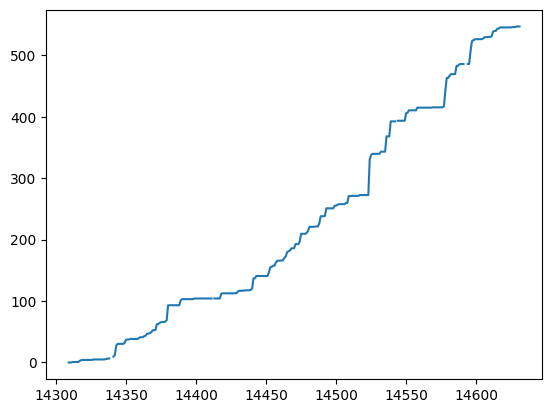

In [10]:
# Buňka pro body 6-8

df_ruzyne = df.loc[df['NAME'] == 'RUZYNE'].reset_index(drop=True)
df_mosnov = df.loc[df['NAME'] == 'MOSNOV'].reset_index(drop=True)

korelacni_koeficient = df_ruzyne['TMAX'].corr(df_mosnov['TMAX'])

df_spojeno = pd.merge(df_ruzyne[['DATE','TMAX']],df_mosnov[['DATE','TMAX']],on='DATE',suffixes=('_RUZYNE','_MOSNOV'))
korelacni_koeficient2 =df_spojeno['TMAX_RUZYNE'].corr(df_spojeno['TMAX_MOSNOV'])

df_kumulativni_srazky_ruzyne_2020 = df.loc[(df['NAME'] == 'RUZYNE') &(df['YEAR']==2020)]['PRCP'].cumsum()
df_kumulativni_srazky_ruzyne_2020.plot()

print(f'korelacni koeficient: {korelacni_koeficient}')
print(f'korelacni koeficient2: {korelacni_koeficient2}')